# Electrical characteristic analysis of sample CA12X2

In [1]:
data_path = '../CA12X2/CA12X2_current_from_1e-9_to_10e-9A/CA12X2_current_from_1e-9_to_10e-9A-20220315151857'

with open(data_path, "r", encoding='utf-8') as file_desc:
    text = file_desc.read()
    print(text)

Electrical characterization experiment of current biased Ca2RuO4 crystal along C-axis as a function of temperature with 2-wire connection
Sample name: CA12X2
Area: 4.807e-2cm2
Length: 0.2376e-1cm
Current source from 1e-9A to 10e-9A

### Experiment 20220315151857 ###
Date 2022-03-15 start at 15:16:42 end at 15:18:30 duration 0:01:48
Temperature range from 113.44°K to 113.44°K
Resistivity:
	 average 1.8798e+09𝛀 cm
	 minimum -4.6383e+07𝛀 cm at 113.44°K
	 maximum 4.8061e+09𝛀 cm at 113.44°K
Voltage:
	 average 4.7988e+00V
	 minimum -3.1263e-02V at 113.44°K
	 maximum 1.1954e+01V at 113.44°K



<img src="../CA12X2/Ca12x2_Info/camp_ca12x2.jpg" width=500 />

## Diffrattogramma

![title](../CA12X2/Ca12x2_Info/Ca_X2_drx.JPG)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 6]

## Loading experiment data

In [3]:
data=np.load(data_path + ".npz", allow_pickle=True)
DT = data['datetime']
V = data['voltage']
R = data['resistance']
T = data['temperature']
I = data['current_source']
J = data['current_density']
E = data['electric_field']
RHO = data['resistivity']
        
thickness = V/E
area = I/J
# Density in mA/cm2
J = J * 1000

### Data description

- DT datetime
- V voltage measurements in Volts
- R resistance measurements in Ohm
- T temperature measurements in °K
- I current source in Amps
- J current density in mA/cm^2
- E electric field in V/cm
- RHO resistivity in Ohm cm

In [4]:
print(f"Area {area[0]:.4e}cm2\nThickness:{thickness[0]:.4e}cm")

Area 4.8070e-02cm2
Thickness:2.3760e-02cm


### Temperature

In [5]:
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
     print(f"Temperature is constant: {T[0]:.2f}°K")   
elif diff <= 1: 
    print(f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K")
else:
    print(f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K")


Temperature is constant: 113.44°K


### Input source

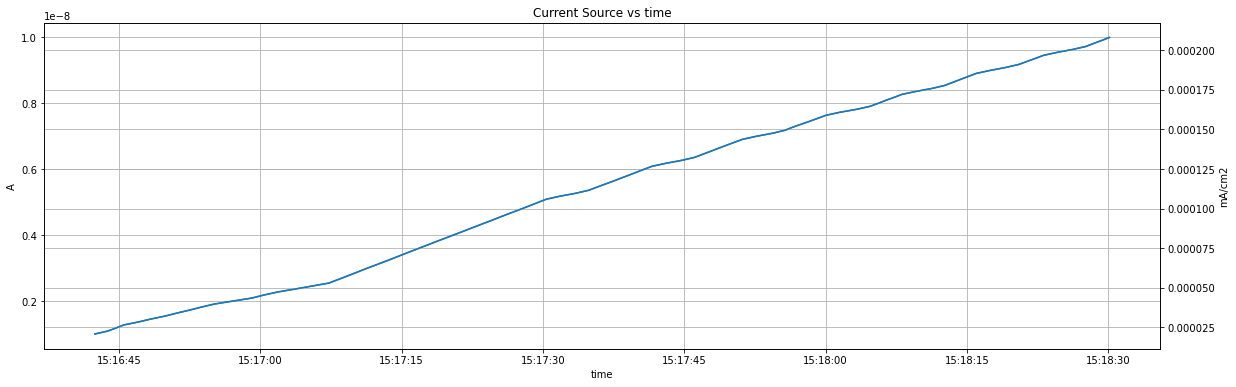

In [6]:
fig, ax1 = plt.subplots()
ax1.set_title("Current Source vs time")
ax1.set_xlabel('time')
ax1.set_ylabel('A')
ax1.plot(DT, I)
ax2 = ax1.twinx()
ax2.set_ylabel('mA/cm2')
ax2.plot(DT, J)
ax1.grid(True)
ax2.grid(True)

In [7]:
if I[0] == I[-1]: 
    print(f"Source is constant: {I[0]:.2e}A ({J[0]:.2e}mA/cm2)")
else:
    print(f"Source span from {np.min(I):.2e}A ({np.min(J):.2e}mA/cm2) to {np.max(I):.2e}A ({np.max(J):.2e}mA/cm2)")


Source span from 1.00e-09A (2.08e-05mA/cm2) to 1.00e-08A (2.08e-04mA/cm2)


## Time analysis

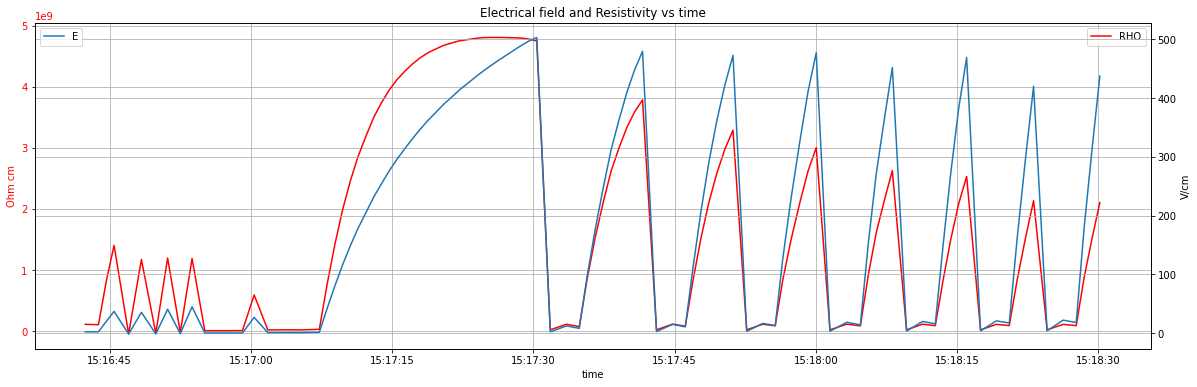

In [8]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field and Resistivity vs time")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='red')
ax1.tick_params(axis='y', labelcolor='r')
ax1.plot(DT, RHO, color='red', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax1.grid(True)
ax2.grid(True)

### Peaks detection

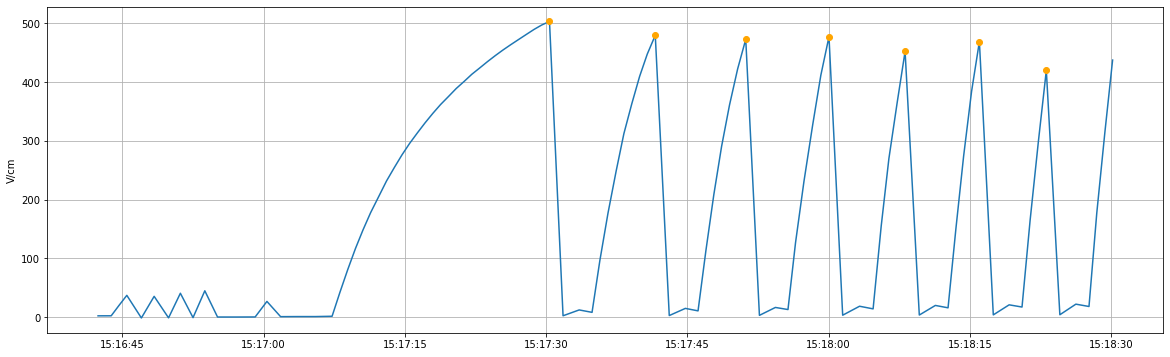

In [9]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=50)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
#plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Time interval between peaks [ms]

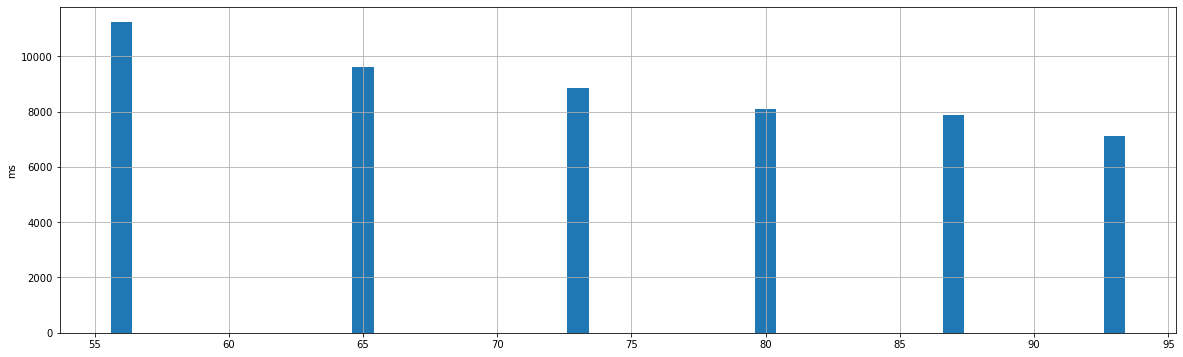

In [10]:
diff = np.ediff1d(DT[peaks].astype(np.datetime64))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int)/1000)
plt.grid(True)

## Current source analysis

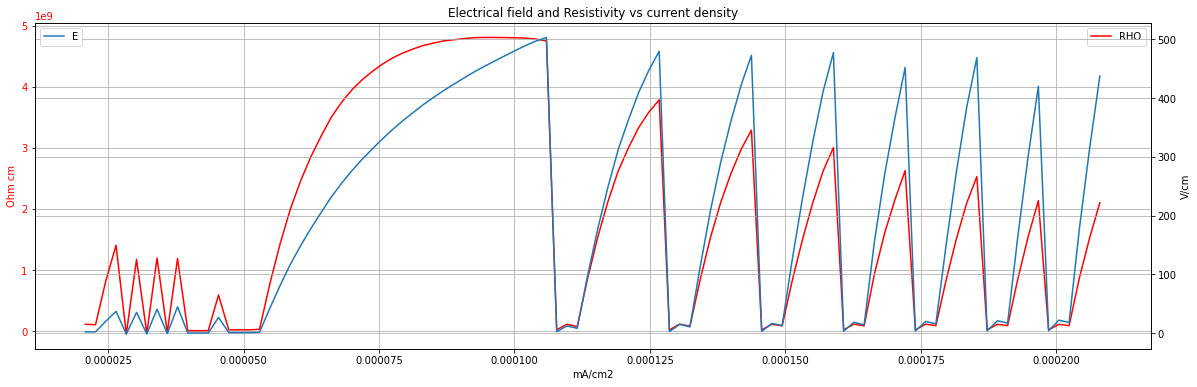

In [11]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field and Resistivity vs current density")
ax1.set_xlabel('mA/cm2')
ax1.set_ylabel('Ohm cm', color='red')
ax1.tick_params(axis='y', labelcolor='r')
ax1.plot(J, RHO, color='red', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(J, E, label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax1.grid(True)
ax2.grid(True)

### Peaks

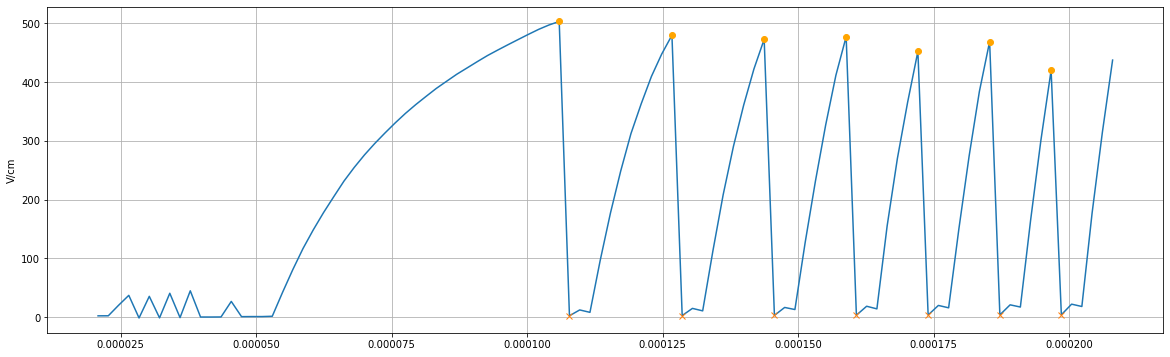

In [12]:
plt.plot(J, E)
plt.plot(J[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(J[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, J[istart.astype(int)], J[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [13]:
print(f"First peak at {J[peaks[0]]:.4e} mA/cm2 with value {E[peaks[0]]:.1f} V/cm\nLast  peak at {J[peaks[-1]]:.4e} mA/cm2 with value {E[peaks[-1]]:.1f} V/cm")

First peak at 1.0591e-04 mA/cm2 with value 503.1 V/cm
Last  peak at 1.9668e-04 mA/cm2 with value 420.0 V/cm


#### Peaks amplitude

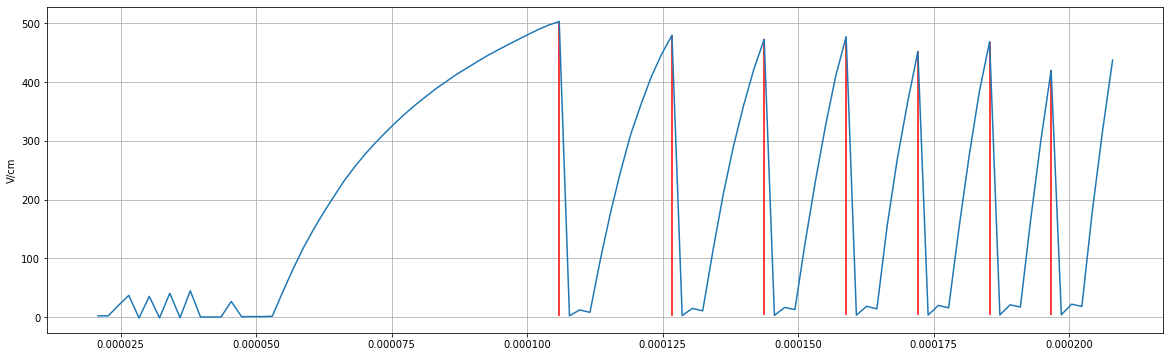

In [14]:
plt.plot(J, E)
plt.vlines(J[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [15]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm\nMaximum amplitude {np.max(diff):.1f} V/cm\nAverage amplitude {np.average(diff):.1f} V/cm")

Minimum amplitude 415.8 V/cm
Maximum amplitude 500.7 V/cm
Average amplitude 464.3 V/cm


#### Distance between peaks

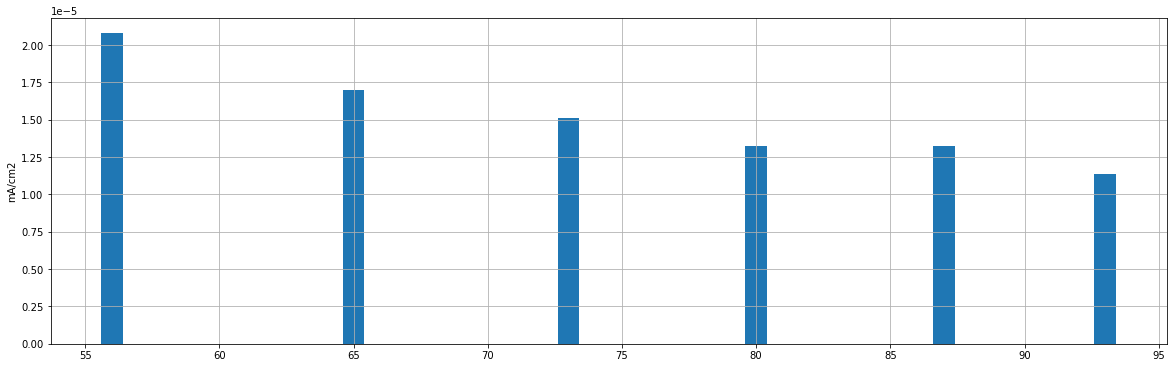

In [16]:
diff = np.ediff1d(J[peaks])
plt.ylabel('mA/cm2')
plt.bar(peaks[1:], diff)
plt.grid(True)

In [17]:
print(diff, "mA/cm2")

[2.08029956e-05 1.70206328e-05 1.51294514e-05 1.32382699e-05
 1.32382699e-05 1.13470885e-05] mA/cm2
